# Import 

In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from spacy_langdetect import LanguageDetector
import nltk  
import numpy as np  
import random  
import string
import matplotlib.pyplot as plt
import urllib.request  
import re  
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#!pip install spacy-langdetect

In [ ]:
#!python -m spacy download en_core_web_lg

In [2]:
nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

In [3]:
FILE="f_df.csv"

In [4]:
#pd.read_csv("final_df.csv")

In [5]:
df = pd.read_csv(FILE, sep="," , index_col=['Unnamed: 0'])
s= pd.Series(df.lyrics)
s1=s.str.lower()
s1
df['paroles'] = s1
df
del df['lyrics']
#df1 = s1.to_frame()

In [6]:
df

,song,year,artist,genre,paroles
0,i-got-that,2007,eazy-e,Hip-Hop,...\n\ntimbo- when you hit me on my phone bett...
1,8-ball-remix,2007,eazy-e,Hip-Hop,"verse 1:\ni don't drink brass monkey, like to ..."
2,extra-special-thankz,2007,eazy-e,Hip-Hop,"19 muthaphukkin 93,\nand i'm back in this bitc..."
3,boyz-in-da-hood,2007,eazy-e,Hip-Hop,"hey yo man, remember that shit eazy did a whil..."
4,automoblie,2007,eazy-e,Hip-Hop,"yo, dre, man, i take this bitch out to the mov..."
...,...,...,...,...,...
231309,who-am-i-drinking-tonight,2012,edens-edge,Country,"i gotta say\nboy, after only just a couple of ..."
231310,liar,2012,edens-edge,Country,i helped you find her diamond ring\nyou made m...
231311,last-supper,2012,edens-edge,Country,look at the couple in the corner booth\nlooks ...
231312,christ-alone-live-in-studio,2012,edens-edge,Country,when i fly off this mortal earth\nand i'm meas...


# Sentiments Analysis

In [ ]:
sid = SentimentIntensityAnalyzer()
counter = 0
max_ = len(df.index)

cols = {
    'song': [],
    'year': [],
    'artist': [],
    'genre': [],
    'lyrics': [],
    'pos': [],
    'neu': [],
    'neg': []
}
df1 = pd.DataFrame(cols)

# Pour chaque paroles dans le dataset
for index in df.index:
    lyrics = df.loc[index]["paroles"]

    # Score de positivité
    comp = sid.polarity_scores(lyrics)
    comp = comp['compound']

    # Récupération des valeurs initiales
    for col in df.columns:
        df1.loc[index, col] = df.loc[index][col]
    # Ajout des nouvelles valeurs
    df1.loc[index, "pos"] = int(comp >= 0.5)
    df1.loc[index, "neu"] = int(0.5 > comp >= -0.5)
    df1.loc[index, "neg"] = int(comp <-0.5)

    # Affichage de la progression
    print(f"{round(counter/max_*100,2)}%", end='\r')

    # Mise à jour du counter
    counter += 1

In [ ]:
del df1['lyrics']

In [ ]:
df1

In [ ]:
df1.to_excel("output.xlsx",engine='xlsxwriter')

In [ ]:
#!pip install xlsxwriter

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

In [ ]:
df1.genre.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
#df1.artist.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
df1

# SA By Artists

In [8]:
artists = [a for a in df["artist"].unique()]

In [13]:
df

,song,year,artist,genre,paroles
0,i-got-that,2007,eazy-e,Hip-Hop,...\n\ntimbo- when you hit me on my phone bett...
1,8-ball-remix,2007,eazy-e,Hip-Hop,"verse 1:\ni don't drink brass monkey, like to ..."
2,extra-special-thankz,2007,eazy-e,Hip-Hop,"19 muthaphukkin 93,\nand i'm back in this bitc..."
3,boyz-in-da-hood,2007,eazy-e,Hip-Hop,"hey yo man, remember that shit eazy did a whil..."
4,automoblie,2007,eazy-e,Hip-Hop,"yo, dre, man, i take this bitch out to the mov..."
...,...,...,...,...,...
231309,who-am-i-drinking-tonight,2012,edens-edge,Country,"i gotta say\nboy, after only just a couple of ..."
231310,liar,2012,edens-edge,Country,i helped you find her diamond ring\nyou made m...
231311,last-supper,2012,edens-edge,Country,look at the couple in the corner booth\nlooks ...
231312,christ-alone-live-in-studio,2012,edens-edge,Country,when i fly off this mortal earth\nand i'm meas...


In [14]:
df2

,artist,pos,neu,neg
0,eazy-e,15.662651,1.204819,83.132530
1,asher-monroe,63.636364,0.000000,36.363636
2,dick-mace,100.000000,0.000000,0.000000
3,alice-on-the-roof,0.000000,0.000000,100.000000
4,daliah-lavi,0.000000,0.000000,100.000000
...,...,...,...,...
11335,clay-walker,68.965517,11.206897,19.827586
11336,dub-fx,33.333333,16.666667,50.000000
11337,corroded,33.333333,0.000000,66.666667
11338,damon-albarn,56.521739,26.086957,17.391304


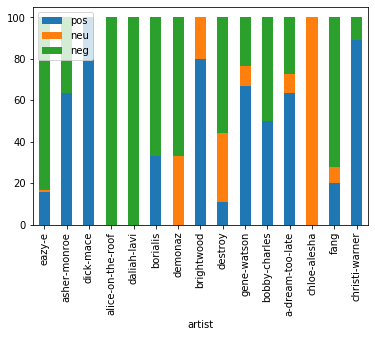

In [17]:
df2[:15].plot.bar(x='artist', stacked=True)
plt.show()

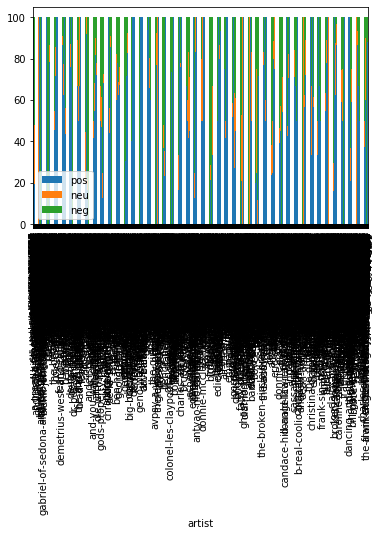

In [10]:
df2 = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0

for artist in artists:
    num_positive = 0
    num_negative = 0
    num_neutral = 0

    for sentence in df.loc[df['artist'] == artist]["paroles"]:
        comp = sid.polarity_scores(sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1

    num_total = num_negative + num_neutral + num_positive
    try:
        percent_negative = (num_negative/float(num_total))*100
    except ZeroDivisionError as zero_division_error:
        print(artist)
        print(df.loc[df['artist'] == artist]["paroles"])
        break
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    df2.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1

df2.plot.bar(x='artist', stacked=True)
plt.show()


In [18]:
df2.to_excel("sa_artist.xlsx",engine='xlsxwriter')

# lexical richness

In [ ]:
from nltk.corpus import stopwords

df3 = pd.DataFrame(columns=('artist', 'lexicalrichness'))
for artist in df['artist']:
    all_words = ''
    num_words = 0
    raw_text = ""
    for sentence in df.loc[df['artist'] == artist]["paroles"]:
        raw_text += sentence
            
    words = raw_text.split(" ")
    filtered_words = [word for word in words if word not in stopwords.words('english') and len(word) > 1 and word not in ['na','la']] # remove the stopwords
    
    a = len(set(filtered_words))
    b = len(words)
    df3.loc[i] = (artist, (a/float(b))*100)
    i+=1
    
df3.plot.bar(x='artist', y='lexicalrichness', title='Lexical richness of each Artist');
plt.show()  